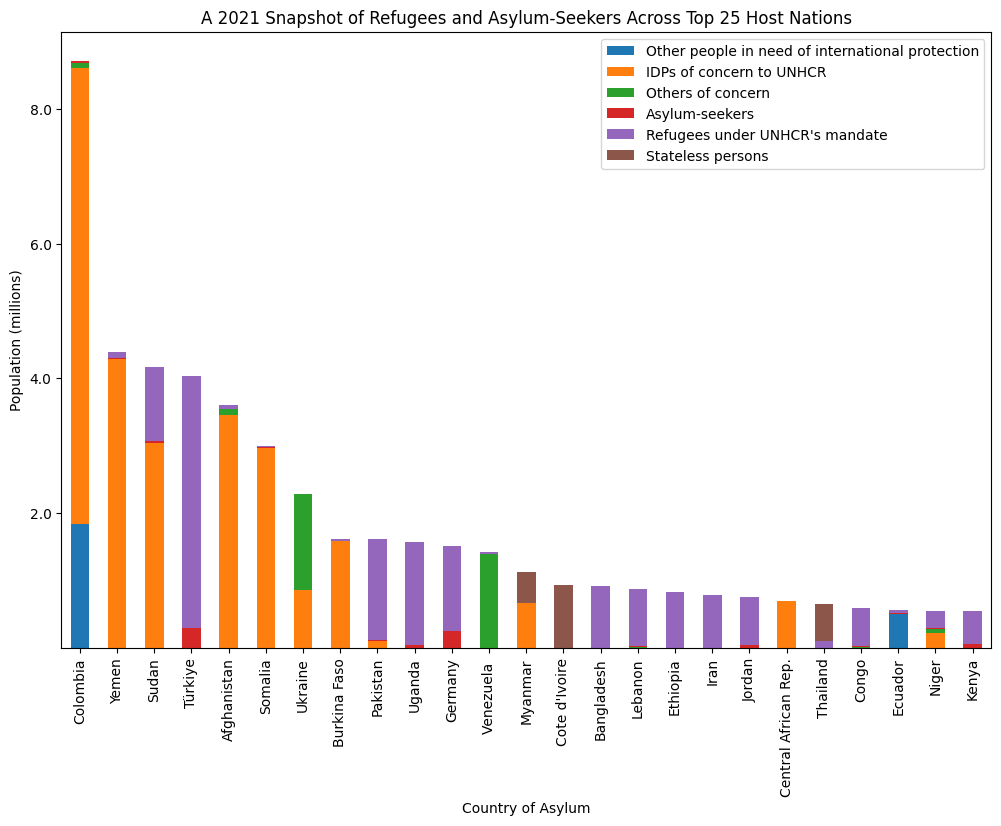

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load the data from the CSV file
file_path = 'demographics.csv'
df = pd.read_csv(file_path)

# Define the full names for the population types, excluding 'Host Community'
population_types = {
    'OIP': 'Other people in need of international protection',
    'IDP': 'IDPs of concern to UNHCR',
    'OOC': 'Others of concern',
    'ASY': 'Asylum-seekers',
    'REF': 'Refugees under UNHCR\'s mandate',
    'STA': 'Stateless persons'
}

# Sum the totals for each population type within each country of asylum
for abbreviation, full_name in population_types.items():
    df[full_name] = df[df['Population Type'] == abbreviation][['Female total', 'Male total']].sum(axis=1)

# Group by 'Country of asylum' and aggregate the totals for each population type
summary_df = df.groupby('Country of asylum').agg({full_name: 'sum' for abbreviation, full_name in population_types.items()})

# Sort countries by total population and select the top 25
top_countries_asylum = summary_df.sum(axis=1).nlargest(25).index
top_summary_df_asylum = summary_df.loc[top_countries_asylum]

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 8))  # Adjusted for a better fit
(top_summary_df_asylum / 1e6).plot(kind='bar', ax=ax, stacked=True)  # Convert population to millions

# Format the y-axis labels to show as 'x million' without trailing zeroes
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.1f}'.format(x) if x != 0 else '0'))

# Rotate the x-axis labels for better legibility
plt.xticks(rotation=90)

# Update the chart title to be more meaningful and understandable
ax.set_title('A 2021 Snapshot of Refugees and Asylum-Seekers Across Top 25 Host Nations')
ax.set_xlabel('Country of Asylum')
ax.set_ylabel('Population (millions)')

# Create the legend with the full names, excluding 'Host Community'
ax.legend([full_name for abbreviation, full_name in population_types.items()])

# Save the figure to a file
plt.savefig('Refugee and Displaced Populations by Category in Host Countries.png', bbox_inches='tight', dpi=400)

# Show the figure
plt.show()



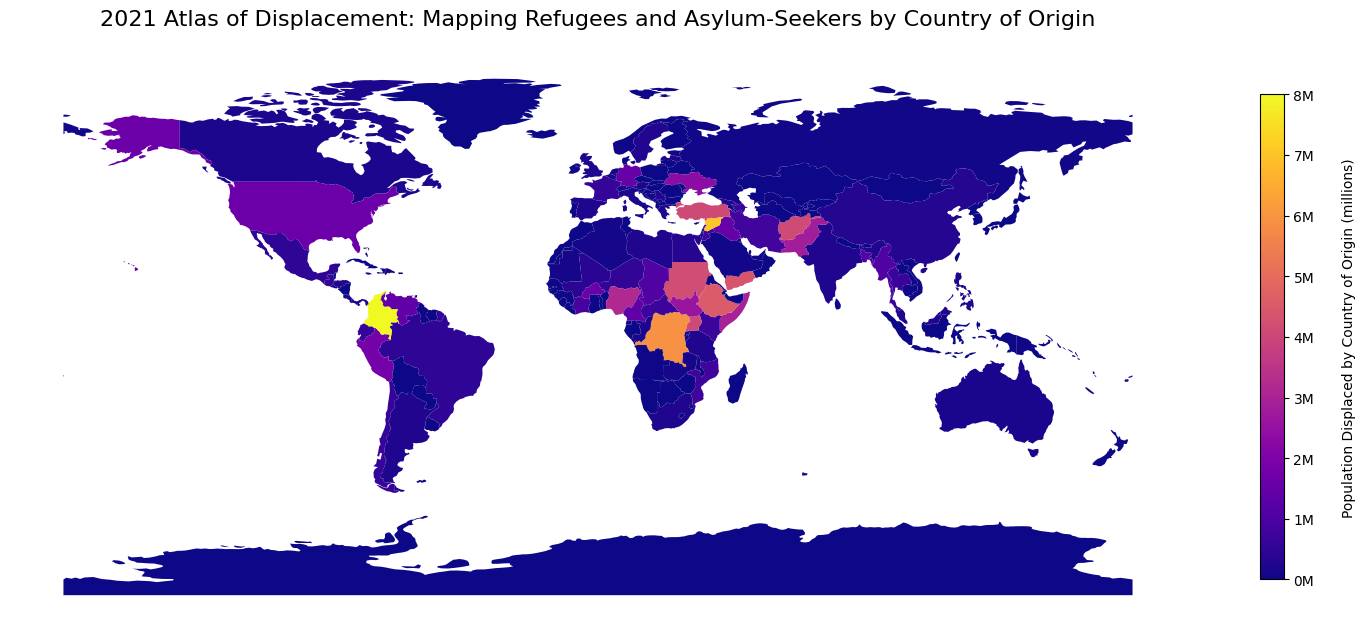

In [85]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.ticker import FuncFormatter

# Your previous code to load, process data, and create the 'world' GeoDataFrame

# Create a function to format labels without 1e6
def millions(x, pos):
    'The two args are the value and tick position'
    return '{}M'.format(int(x*1e-6))

# Create the heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
heatmap = world.plot(column='Total', ax=ax, cmap='plasma', legend=True,
                     norm=Normalize(vmin=0, vmax=8e6),  # Adjust vmax to the max value of 'Total'
                     legend_kwds={'shrink': 0.5, 'format': FuncFormatter(millions)})

# Remove the axes
ax.set_axis_off()

# Add title
ax.set_title('2021 Atlas of Displacement: Mapping Refugees and Asylum-Seekers by Country of Origin', pad=20, fontsize=16)

# Adjust the legend label
colorbar = heatmap.get_figure().get_axes()[1]
colorbar.set_ylabel('Population Displaced by Country of Origin (millions)', rotation=90, labelpad=20)

# Tight layout to minimize white space
plt.tight_layout()

# Save the figure
plt.savefig('heatmap_with_title_and_label.png', bbox_inches='tight')

# Show the figure
plt.show()
